In [5]:
import sys; sys.path.insert(0, '..') # necessary for successful custom module imports
import pandas as pd
import numpy as np
from scipy.optimize import Bounds
from models.jump_vasicek import JumpVasicek
from calibration.mle_calibration import Calibration

In [6]:
df_1mo_yc = pd.read_csv("../data/DGS1MO.csv")
df_1mo_yc.index = pd.to_datetime(df_1mo_yc.DATE)
df_1mo_yc = df_1mo_yc.dropna().drop(columns=["DATE"])
df_1mo_yc.DGS1MO = df_1mo_yc.DGS1MO.replace(".", np.nan).astype(float)/100
df_1mo_yc = df_1mo_yc.dropna()
df_1mo_yc = df_1mo_yc.iloc[-int(252*3):-1, :] # last 1 years (252)

<AxesSubplot:xlabel='DATE'>

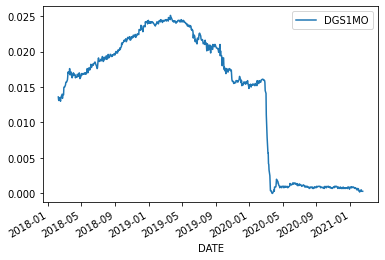

In [7]:
df_1mo_yc.plot()

In [9]:
inital_model_params = {
    "kappa": 0.5,
    "mu_r": 0.03,
    "sigma": 0.03,
    "mu": 0,
    "gamma": 0.01,
    "h": 10
}
calibrator = Calibration(
    df_1mo_yc.DGS1MO, dt=1/252, model_class=JumpVasicek,
    initial_params=inital_model_params)
bounds = Bounds([0.001, 0.001, 0.001, 0.001, 0.1], [1, 0.1, 0.5, 0.1, 100])
calibrator.calibrate(bounds=bounds, params=("kappa", "mu_r", "sigma", "gamma", "h"))

Params: {'kappa': 0.5, 'mu_r': 0.03, 'sigma': 0.03, 'mu': 0, 'gamma': 0.01, 'h': 10.0}
Neg Log Likelihood: -11.93329945293214
Params: {'kappa': 0.50000001, 'mu_r': 0.03, 'sigma': 0.03, 'mu': 0, 'gamma': 0.01, 'h': 10.0}
Neg Log Likelihood: -11.93329945292199
Params: {'kappa': 0.5, 'mu_r': 0.03000001, 'sigma': 0.03, 'mu': 0, 'gamma': 0.01, 'h': 10.0}
Neg Log Likelihood: -11.933299452692898
Params: {'kappa': 0.5, 'mu_r': 0.03, 'sigma': 0.03000001, 'mu': 0, 'gamma': 0.01, 'h': 10.0}
Neg Log Likelihood: -11.933299129289637
Params: {'kappa': 0.5, 'mu_r': 0.03, 'sigma': 0.03, 'mu': 0, 'gamma': 0.01000001, 'h': 10.0}
Neg Log Likelihood: -11.933299445793548
Params: {'kappa': 0.5, 'mu_r': 0.03, 'sigma': 0.03, 'mu': 0, 'gamma': 0.01, 'h': 10.00000001}
Neg Log Likelihood: -11.933299452899861
Params: {'kappa': 0.49898498970701216, 'mu_r': 0.006075848453991638, 'sigma': 0.001, 'mu': 0, 'gamma': 0.001, 'h': 9.996772182254023}
Neg Log Likelihood: -14.281523270820477
Params: {'kappa': 0.49898499970701

Params: {'kappa': 0.5472136381412225, 'mu_r': 0.001, 'sigma': 0.001, 'mu': 0, 'gamma': 0.00100001, 'h': 9.991491598016324}
Neg Log Likelihood: -14.295708802485242
Params: {'kappa': 0.5472136381412225, 'mu_r': 0.001, 'sigma': 0.001, 'mu': 0, 'gamma': 0.001, 'h': 9.991491608016325}
Neg Log Likelihood: -14.295708866381784
Params: {'kappa': 0.6025248569611745, 'mu_r': 0.001, 'sigma': 0.001, 'mu': 0, 'gamma': 0.001, 'h': 9.985473049525496}
Neg Log Likelihood: -14.29806396448791
Params: {'kappa': 0.6025248669611746, 'mu_r': 0.001, 'sigma': 0.001, 'mu': 0, 'gamma': 0.001, 'h': 9.985473049525496}
Neg Log Likelihood: -14.298063964882303
Params: {'kappa': 0.6025248569611745, 'mu_r': 0.00100001, 'sigma': 0.001, 'mu': 0, 'gamma': 0.001, 'h': 9.985473049525496}
Neg Log Likelihood: -14.298063943686728
Params: {'kappa': 0.6025248569611745, 'mu_r': 0.001, 'sigma': 0.00100001, 'mu': 0, 'gamma': 0.001, 'h': 9.985473049525496}
Neg Log Likelihood: -14.298062280338646
Params: {'kappa': 0.6025248569611745, 

      fun: -14.303916737635465
 hess_inv: <5x5 LbfgsInvHessProduct with dtype=float64>
      jac: array([3.46389582e-04, 1.35589993e+00, 2.09615882e+02, 6.30433963e+00,
       3.29141132e-03])
  message: 'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
     nfev: 96
      nit: 8
     njev: 16
   status: 0
  success: True
        x: array([8.71144857e-01, 1.00000000e-03, 1.00000000e-03, 1.00000000e-03,
       9.95470171e+00])